In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'NVDA', start = '2003-03-11',end = '2024-04-18')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-03-11,1.019167,1.035833,1.007500,1.019167,0.934884,41714400
2003-03-12,1.027500,1.050000,1.018333,1.047500,0.960874,49392000
2003-03-13,1.078333,1.158333,1.073333,1.151667,1.056427,136273200
2003-03-14,1.155833,1.166667,1.110000,1.118333,1.025849,109422000
2003-03-17,1.100000,1.205833,1.097500,1.183333,1.085474,130780800
2003-03-18,1.179167,1.192500,1.150000,1.174167,1.077066,93228000
2003-03-19,1.176667,1.188333,1.138333,1.180000,1.082416,71299200
2003-03-20,1.180000,1.215833,1.149167,1.190833,1.092354,78006000
2003-03-21,1.231667,1.235833,1.126667,1.180000,1.082416,168180000


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Date'], axis=1, inplace=True)

In [3]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Close,Adj Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,1.391667,1.404167,1.375000,1.394167,1.278873,42.487799,1.438981,1.528966,1.564772,1.291867
1,1.410000,1.437500,1.399167,1.408333,1.291867,44.089193,1.436062,1.526578,1.562700,1.315565
2,1.393333,1.438333,1.385000,1.434167,1.315565,46.974123,1.435881,1.524748,1.560998,1.298747
3,1.450833,1.477500,1.406667,1.415833,1.298747,45.200698,1.433972,1.522591,1.559075,1.314799
4,1.417500,1.438333,1.395833,1.433333,1.314799,47.237839,1.433911,1.520824,1.557410,1.273521
5,1.425000,1.452500,1.386667,1.388333,1.273521,42.849234,1.429570,1.518200,1.555170,1.301805
6,1.389167,1.420833,1.380833,1.419167,1.301805,46.498326,1.428580,1.516239,1.553369,1.341555
7,1.445000,1.490000,1.425000,1.462500,1.341555,51.190926,1.431810,1.515175,1.552165,1.318622
8,1.440000,1.473333,1.430000,1.437500,1.318622,48.558270,1.432352,1.513637,1.550646,1.312506
9,1.416667,1.458333,1.414167,1.430833,1.312506,47.855061,1.432207,1.511997,1.549060,1.307920


In [4]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[6.11706663e-04 5.80582405e-04 6.42174874e-04 ... 3.42226434e-04
  3.03197717e-04 6.01518255e-04]
 [6.30849274e-04 6.14834651e-04 6.68040545e-04 ... 3.38906839e-04
  3.00007118e-04 6.26481528e-04]
 [6.13446188e-04 6.15690660e-04 6.52877778e-04 ... 3.36363881e-04
  2.97385669e-04 6.08765503e-04]
 ...
 [9.35763025e-01 9.25757390e-01 9.35996586e-01 ... 9.91704429e-01
  9.90997057e-01 9.05182673e-01]
 [9.29487590e-01 9.30258193e-01 9.18861210e-01 ... 9.95697194e-01
  9.95383384e-01 9.20077888e-01]
 [9.01660664e-01 9.04620075e-01 9.20306143e-01 ... 1.00000000e+00
  1.00000000e+00 8.84472623e-01]]


In [6]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

5163
[[[6.11706663e-04 5.80582405e-04 6.42174874e-04 ... 3.68621455e-01
   4.48920325e-04 3.42226434e-04]
  [6.30849274e-04 6.14834651e-04 6.68040545e-04 ... 3.89474741e-01
   4.45615935e-04 3.38906839e-04]
  [6.13446188e-04 6.15690660e-04 6.52877778e-04 ... 4.27042174e-01
   4.45411632e-04 3.36363881e-04]
  ...
  [9.38007840e-04 9.10263746e-04 9.18666432e-04 ... 5.34574449e-01
   6.46558171e-04 3.61070257e-04]
  [8.82318412e-04 8.76011378e-04 9.31153536e-04 ... 5.80059772e-01
   6.54260850e-04 3.64990846e-04]
  [8.90149571e-04 8.79436394e-04 9.18666432e-04 ... 5.22055056e-01
   6.56378128e-04 3.67595489e-04]]

 [[6.30849274e-04 6.14834651e-04 6.68040545e-04 ... 3.89474741e-01
   4.45615935e-04 3.38906839e-04]
  [6.13446188e-04 6.15690660e-04 6.52877778e-04 ... 4.27042174e-01
   4.45411632e-04 3.36363881e-04]
  [6.73485609e-04 6.55937787e-04 6.76067786e-04 ... 4.03948713e-01
   4.43250045e-04 3.33366762e-04]
  ...
  [8.82318412e-04 8.76011378e-04 9.31153536e-04 ... 5.80059772e-01
   6.

In [7]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [8]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

4106
(4106, 30, 8)
(1027, 30, 8)
(4106, 1)
(1027, 1)
[[0.00092764]
 [0.00095663]
 [0.00095824]
 ...
 [0.05079009]
 [0.05626788]
 [0.05247516]]


In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.7121e-04 - val_loss: 1.7156e-05
Epoch 2/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.0346e-06 - val_loss: 1.3877e-05
Epoch 3/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 8.6768e-07 - val_loss: 2.5238e-05
Epoch 4/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.0632e-06 - val_loss: 1.1526e-05
Epoch 5/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.3118e-06 - val_loss: 9.5086e-06
Epoch 6/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.0508e-06 - val_loss: 1.0337e-05
Epoch 7/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 8.5834e-07 - val_loss: 9.6846e-06
Epoch 8/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 1.6760e-06 - val_loss: 9.5839e-06
Epoch 9/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 1.0671e-06 - val_loss: 8.4889e-06
Epoch 10/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 1.1095e-06 - val_loss: 9.0568e-06
Epoch 11/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms

In [10]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
[0.05459983] [0.05513925]
[0.05273523] [0.0532442]
[0.05384531] [0.05506576]
[0.05489264] [0.06464335]
[0.05498279] [0.06370895]
[0.06066741] [0.06675888]
[0.06349263] [0.06557512]
[0.06552802] [0.0689505]
[0.06543055] [0.0684282]
[0.06670553] [0.06303966]


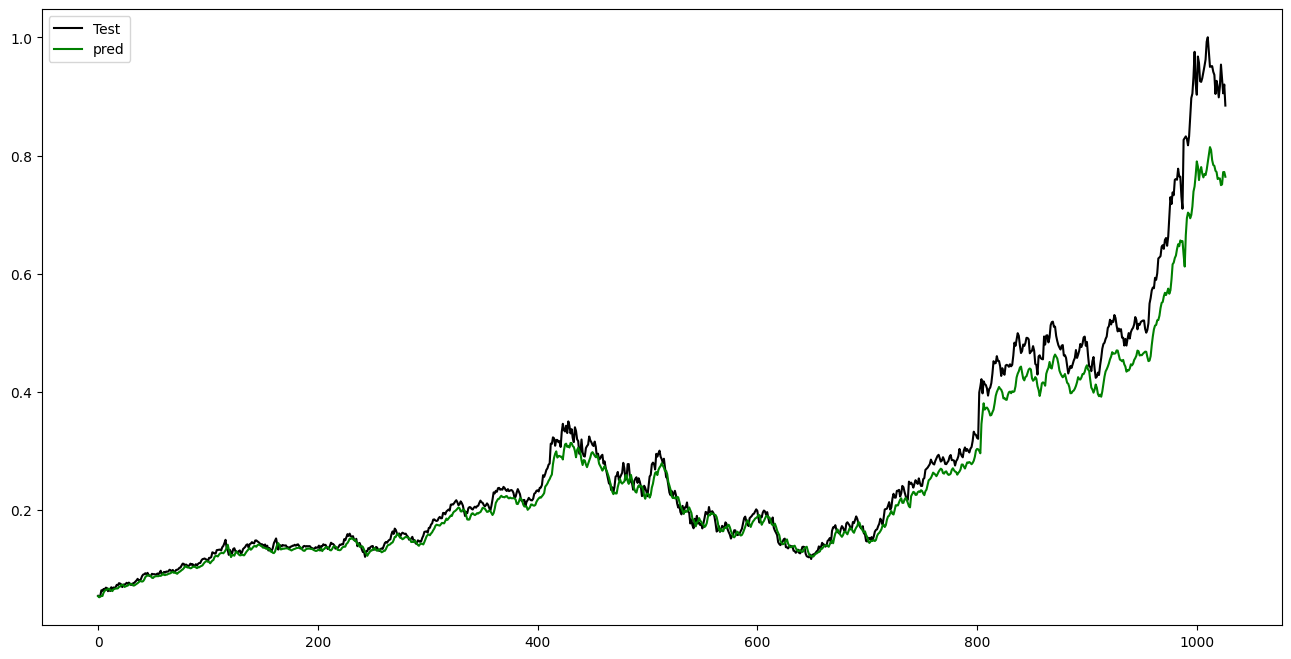

In [11]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()